In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
X=pd.read_csv('/kaggle/input/fullcleandata/traindataohe.csv')
y=pd.read_csv('/kaggle/input/fullcleandata/y_trainfat.csv')
train_preohe=pd.read_csv('/kaggle/input/trainpreohe/superdtrain.csv')


In [31]:
X.columns

Index(['Unnamed: 0', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [32]:
X.shape

(22845, 24)

In [33]:
X["NObeyesdad"]=y["NObeyesdad"]

In [34]:
X.drop(columns='Unnamed: 0', inplace=True)

In [35]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 2500x2000 with 0 Axes>

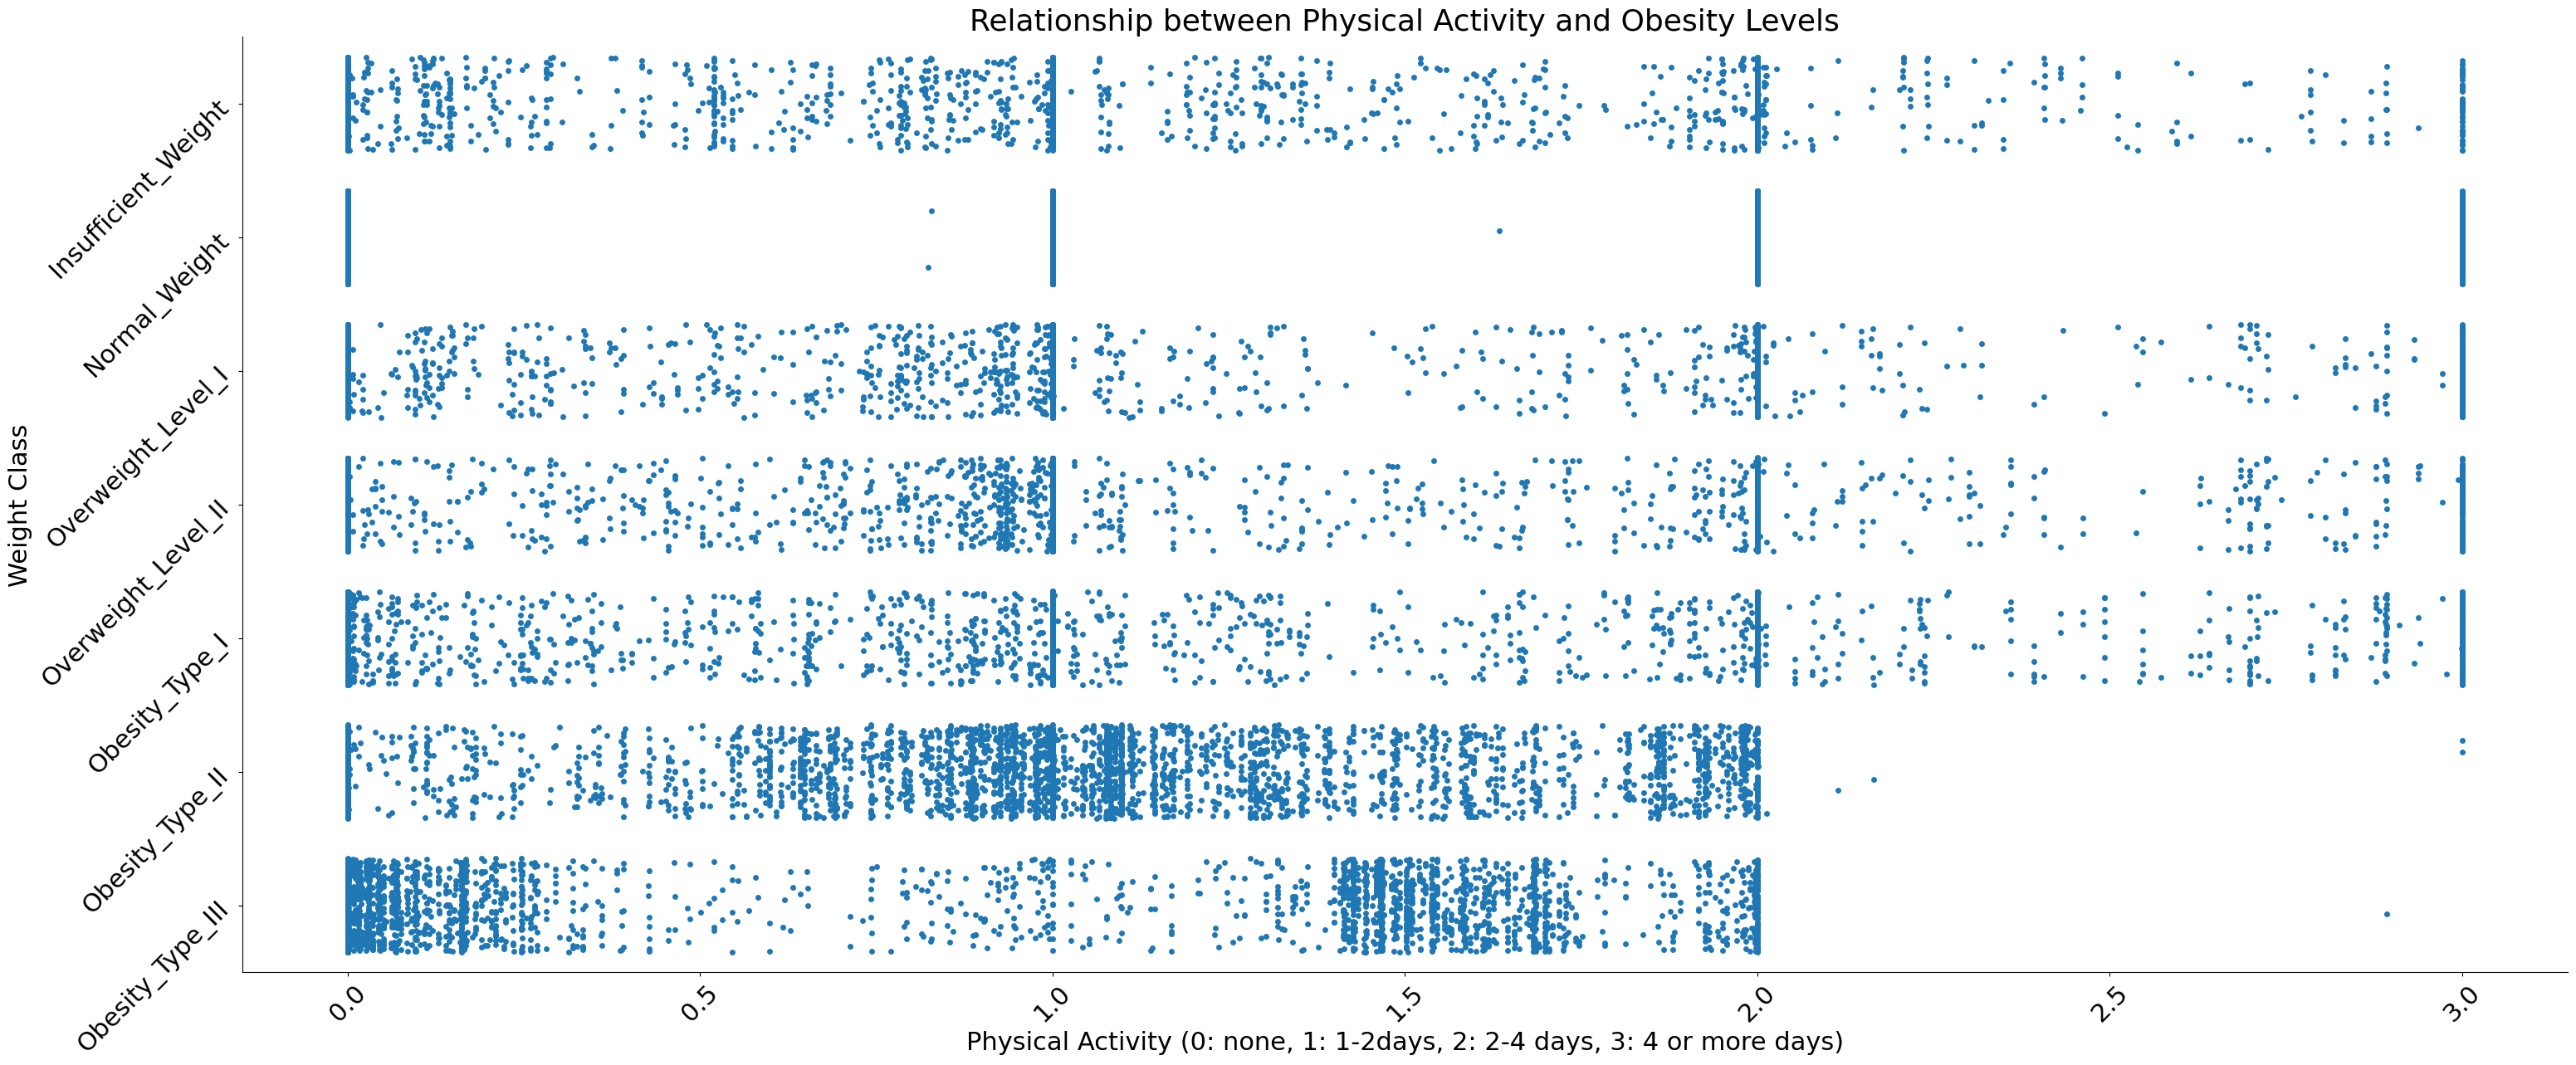

In [79]:
# # sns.histplot(data=X, x=round(X["FAF"],0), y="NObeyesdad",  multiple="dodge", order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])
# sns.catplot(
#     data=X, x="FAF", y="NObeyesdad",
#     kind="swarm"
# )
plt.figure(figsize=(25, 20))

sns.catplot(data=X, x=round(X["FAF"],3), y="NObeyesdad",jitter=.35,order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"],  height=12,  # Height of the plot
    aspect=2.5  # Aspect ratio of the plot (height*aspect gives the width)
)
plt.xlabel("Physical Activity (0: none, 1: 1-2days, 2: 2-4 days, 3: 4 or more days)", fontsize=22)
plt.ylabel("Weight Class", fontsize=22)
plt.title("Relationship between Physical Activity and Obesity Levels", fontsize=26)
plt.xticks(rotation=45, fontsize=22 )
plt.yticks(rotation=45,fontsize=22);


<Axes: xlabel='FAF', ylabel='NObeyesdad'>

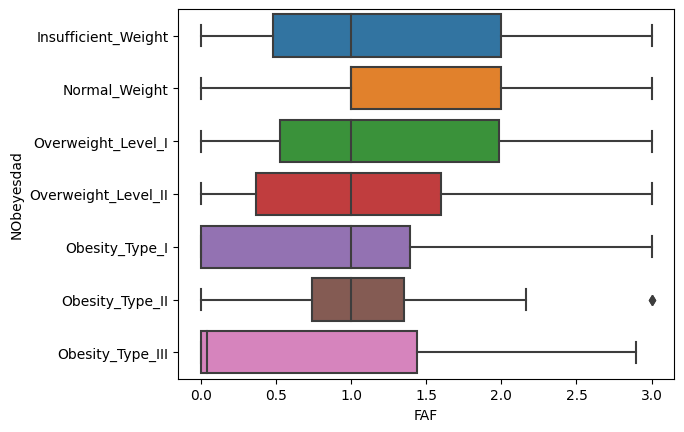

In [59]:
sns.boxplot(data=X, x="FAF", y="NObeyesdad",  order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])


add some confusion matrix to see how it guesses each group, and split into two groups of overweight and normal and underweight


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 2500x2000 with 0 Axes>

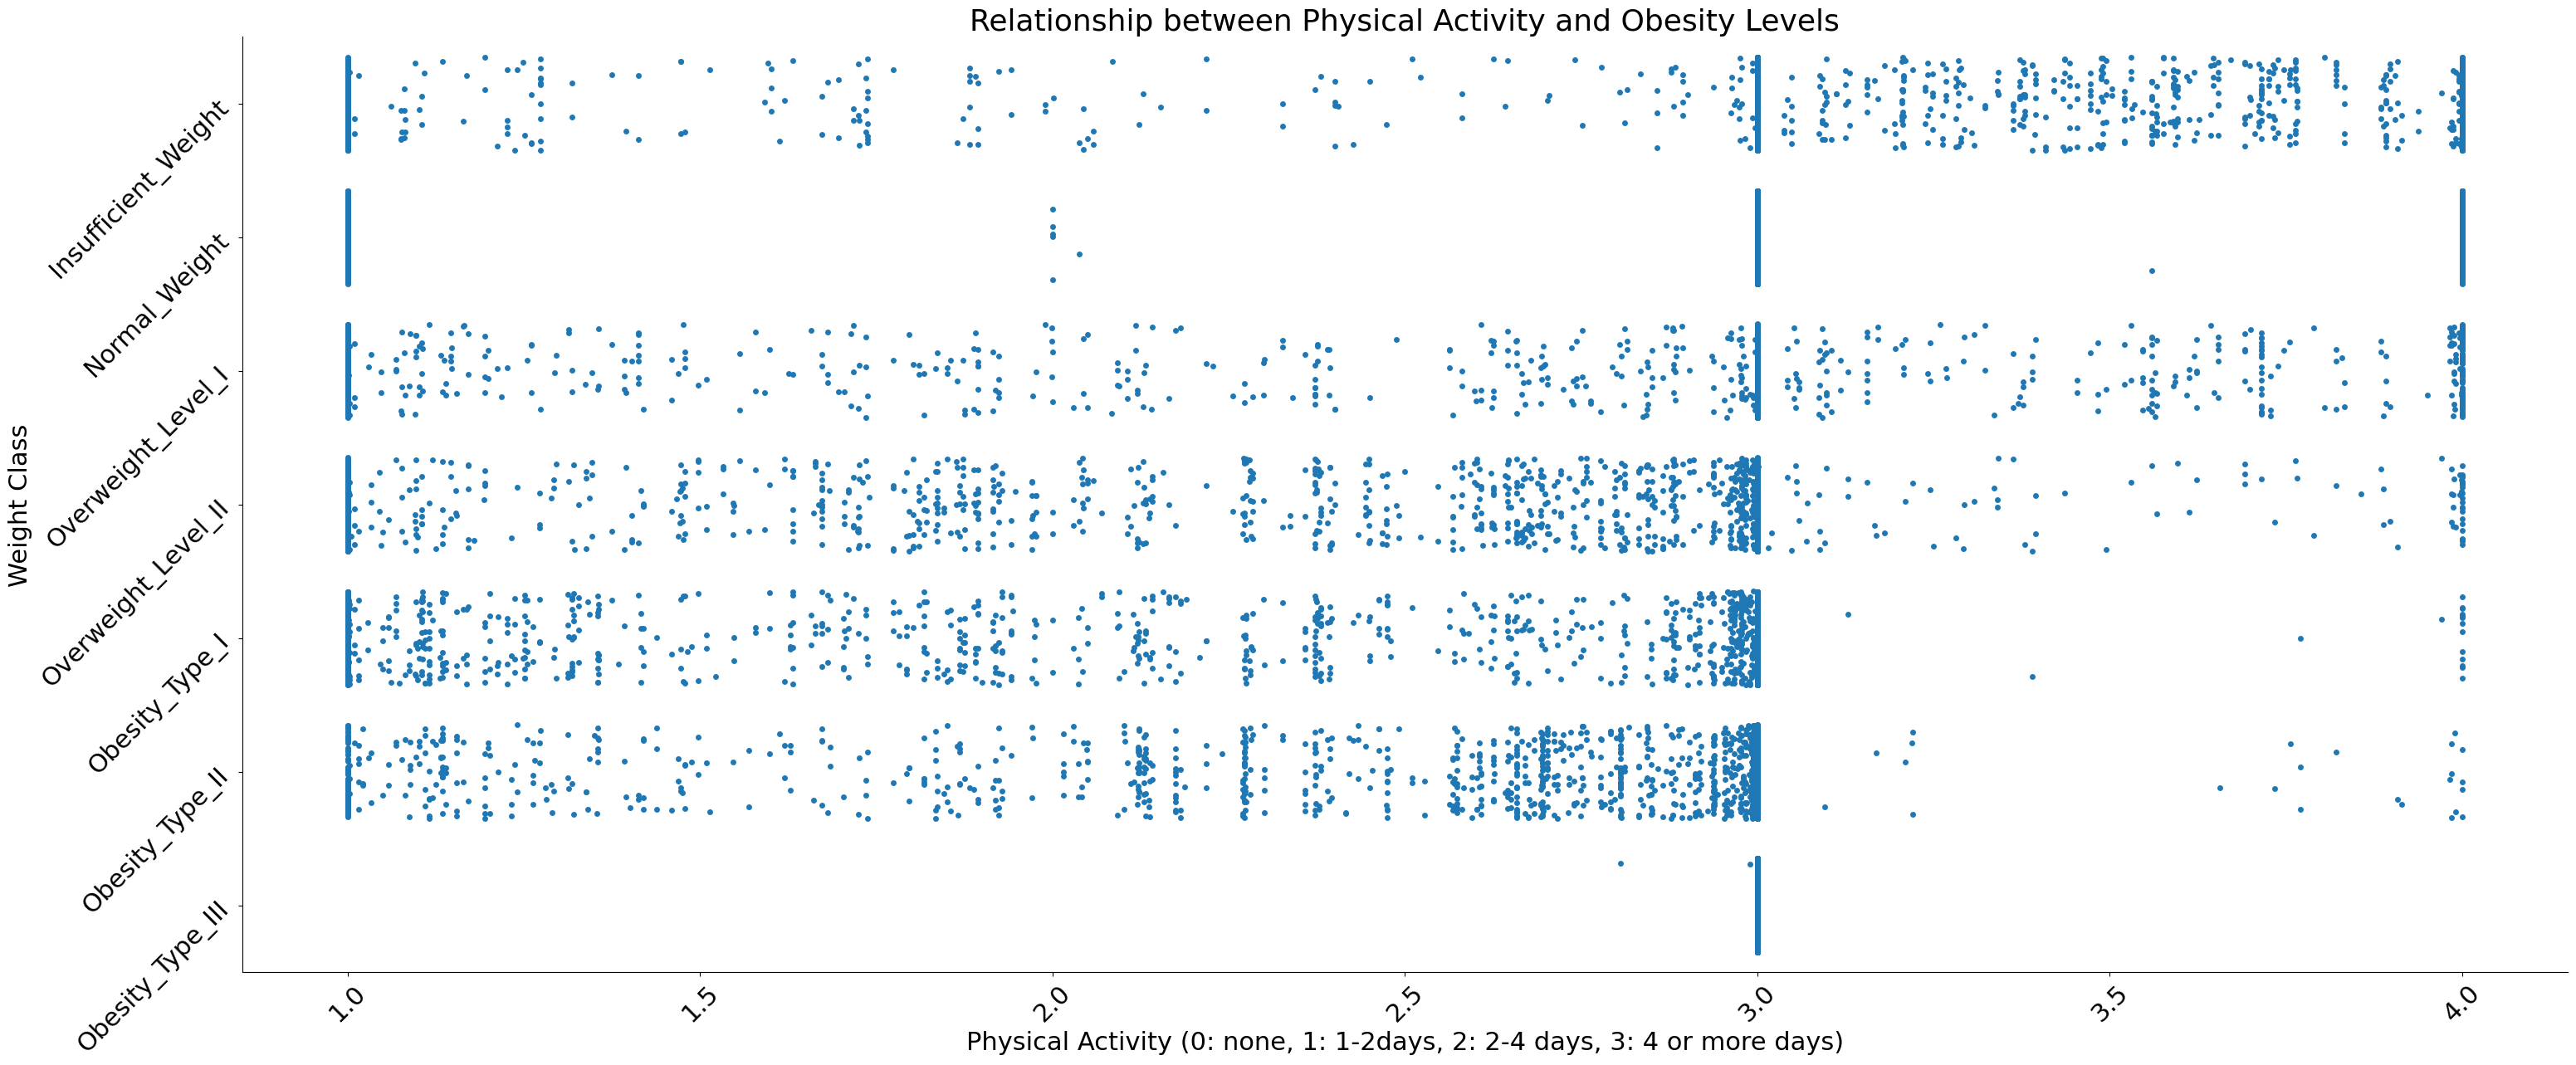

In [83]:
plt.figure(figsize=(25, 20))

sns.catplot(data=X, x=round(X["NCP"],3), y="NObeyesdad",jitter=.35,order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"],  height=12,  # Height of the plot
    aspect=2.5  # Aspect ratio of the plot (height*aspect gives the width)
)
plt.xlabel("Physical Activity (0: none, 1: 1-2days, 2: 2-4 days, 3: 4 or more days)", fontsize=22)
plt.ylabel("Weight Class", fontsize=22)
plt.title("Relationship between Physical Activity and Obesity Levels", fontsize=26)
plt.xticks(rotation=45, fontsize=22 )
plt.yticks(rotation=45,fontsize=22);


<Axes: xlabel='NCP', ylabel='NObeyesdad'>

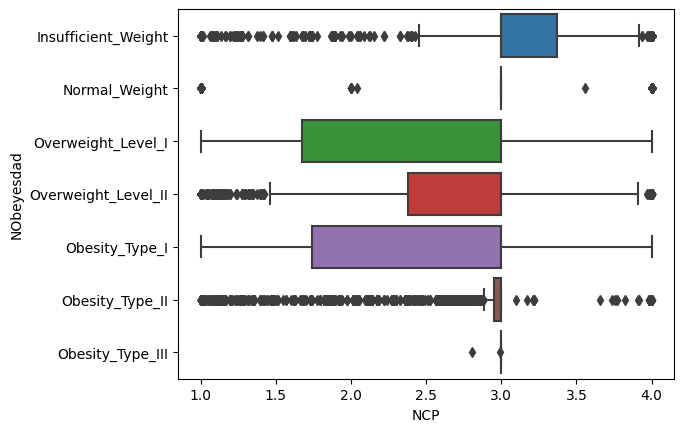

In [38]:
sns.boxplot(data=X, x="NCP", y="NObeyesdad",  order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])


<Axes: xlabel='FCVC', ylabel='NObeyesdad'>

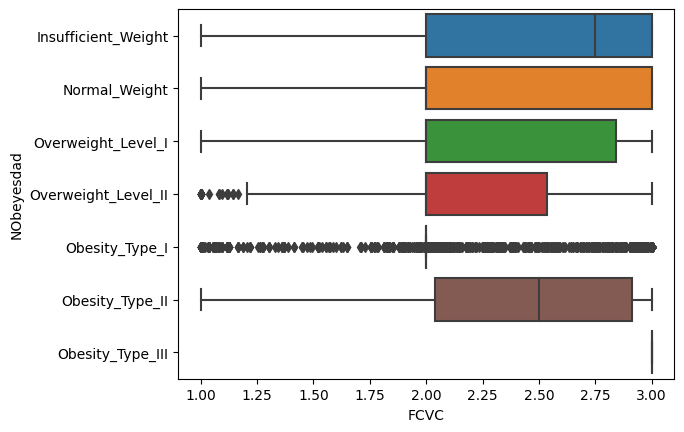

In [39]:
sns.boxplot(data=X, x="FCVC", y="NObeyesdad",  order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])


<Axes: xlabel='TUE', ylabel='NObeyesdad'>

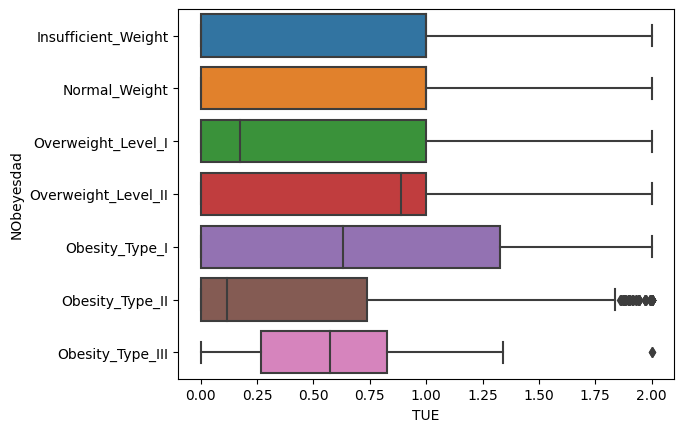

In [80]:
sns.boxplot(data=X, x="TUE", y="NObeyesdad",  order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])


<Axes: xlabel='Age', ylabel='NObeyesdad'>

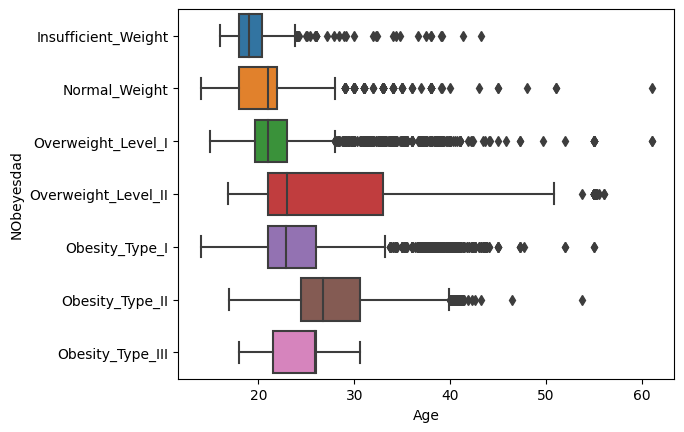

In [41]:
sns.boxplot(data=X, x="Age", y="NObeyesdad",  order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])


In [42]:
df_original=df[:498]

In [43]:
df_original.NObeyesdad.value_counts()

NObeyesdad
Normal_Weight          287
Overweight_Level_I      58
Overweight_Level_II     58
Obesity_Type_I          47
Insufficient_Weight     34
Obesity_Type_II         11
Obesity_Type_III         3
Name: count, dtype: int64

In [44]:
df_original["BMI"]=df_original["Weight"]/(df_original["Height"]**2)

/tmp/ipykernel_175/3846246041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original["BMI"]=df_original["Weight"]/(df_original["Height"]**2)


In [45]:
df_original[df_original['NObeyesdad']=="Obesity_Type_III"]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
202,Female,26.0,1.56,102.0,yes,yes,3.0,3.0,Sometimes,yes,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,41.913215
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,49.472390
403,Female,26.0,1.66,112.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,0.0,0.0,no,Automobile,Obesity_Type_III,40.644506


In [46]:
def nobese_relabel(x):
    if x == "Obesity_Type_II" or x == "Obesity_Type_III":
        return "Severe_Obesity"
    else:
        return x

In [47]:
df_original["NObeyesdad"]=df_original["NObeyesdad"].apply(lambda x : nobese_relabel(x))

/tmp/ipykernel_175/1113358854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original["NObeyesdad"]=df_original["NObeyesdad"].apply(lambda x : nobese_relabel(x))


In [48]:
df_original["NObeyesdad"].value_counts()

NObeyesdad
Normal_Weight          287
Overweight_Level_I      58
Overweight_Level_II     58
Obesity_Type_I          47
Insufficient_Weight     34
Severe_Obesity          14
Name: count, dtype: int64

In [49]:
df_original[df_original['NObeyesdad']=="Severe_Obesity"].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,27.285714,1.748571,117.892857,2.500000,2.642857,1.785714,0.714286,0.571429,38.454907
std,6.988216,0.105017,18.757746,0.650444,0.928783,0.801784,0.913874,0.755929,3.857859
min,18.000000,1.560000,93.000000,1.000000,1.000000,1.000000,0.000000,0.000000,35.003199
25%,23.250000,1.682500,110.500000,2.000000,3.000000,1.000000,0.000000,0.000000,35.971592
50%,25.500000,1.750000,116.000000,3.000000,3.000000,2.000000,0.000000,0.000000,37.526811
75%,30.000000,1.822500,120.750000,3.000000,3.000000,2.000000,1.750000,1.000000,39.239278
max,41.000000,1.920000,173.000000,3.000000,4.000000,3.000000,2.000000,2.000000,49.472390


In [50]:
df_original[df_original['NObeyesdad']=="Obesity_Type_II"]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI


we see that the original data had very few instances of the obesity type II and type III, that synthetic data could not properly account for the only valuable would be the BMI which doesnt rely on data

In [51]:
df_original[df_original['NObeyesdad']=="Obesity_Type_II"].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_X=X.copy()

In [28]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad'],
      dtype='object')

In [ ]:
df_X = df_X.rename(columns={'CALC': 'alcohol_consumption', 'NObeyesdad': 'weight_class', 'family_history_with_overweight': 'family_history', 'NCP': 'number_meals_day', 'CH2O': 'water_consumption', 'FCVC':'vegetable_frequency','MTRANS': 'transportation_method','CAEC': 'snacks','FAF': 'physical_activity_frequency'}, inplace=True)

In [ ]:
df_X.head()

In [55]:
sns.boxplot(data=train_preohe, x="CALC", y='NObeyesdad')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Weight Class')
plt.title('Weight Class Vs Alcohol Consumption')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

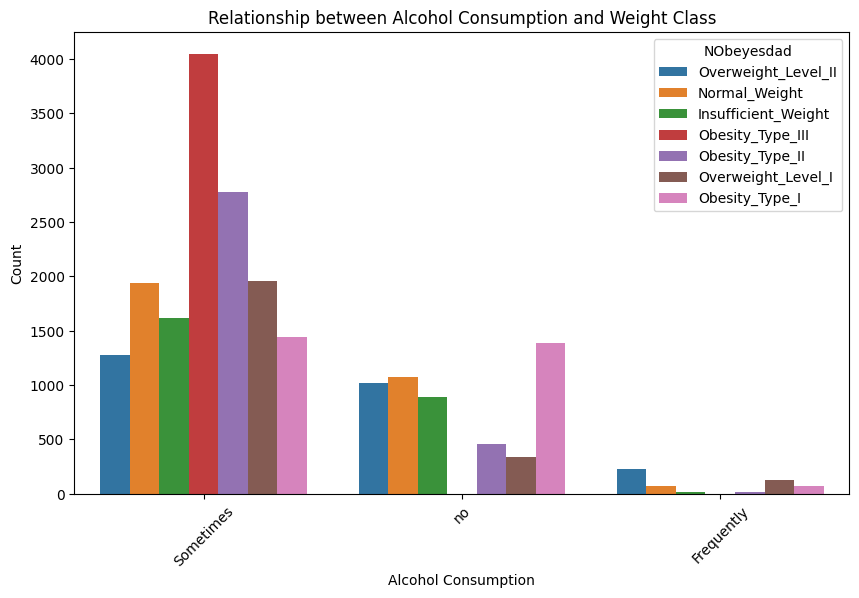

In [57]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=train_preohe, x='CALC', hue='NObeyesdad')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Relationship between Alcohol Consumption and Weight Class')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count');

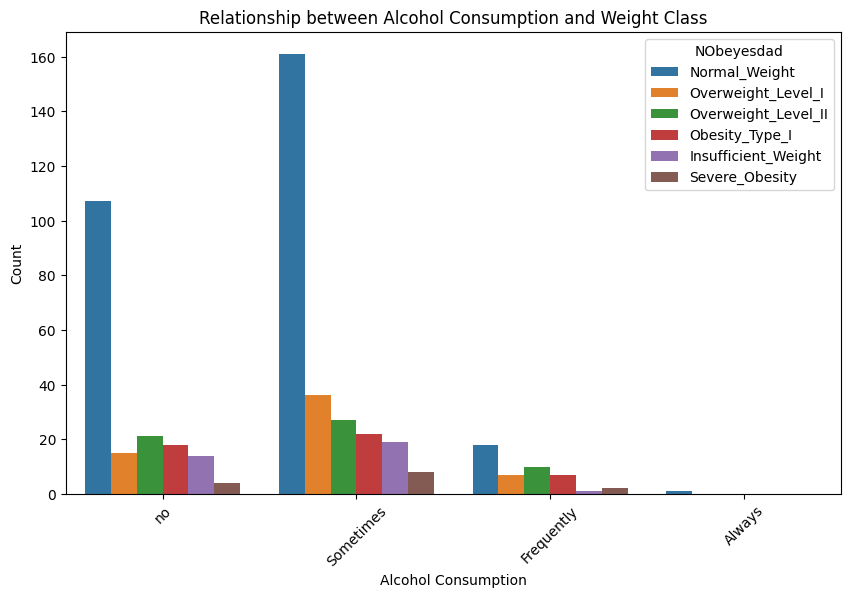

In [58]:
#original
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=df_original, x='CALC', hue='NObeyesdad')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Relationship between Alcohol Consumption and Weight Class')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count');

In [ ]:
# Plotting 

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weight_class', hue='SMOKE', palette='Set2')
plt.title('Relationship between Weight Class and Smoking Status')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.legend(title='Smoking Status')

# Rotate x-axis labels vertically
plt.xticks(rotation=45);

In [ ]:
#original
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='NObeyesdad', hue='SMOKE', palette='Set2')
plt.title('Relationship between Weight Class and Smoking Status')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.legend(title='Smoking Status')

# Rotate x-axis labels vertically
plt.xticks(rotation=90);

In [ ]:
smoke_ratio=df_original.SMOKE.groupby(df["NObeyesdad"]).value_counts()

In [ ]:
i=0
while i<14:
    print(smoke_ratio)
    print(smoke_ratio[i]/smoke_ratio[i+1])
    i+=2
    

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='weight_class', y='SMOKE', hue='weight_class', palette='Set2', inner='quartile')
plt.title('Distribution of Smoking Status across Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Smoking Status')
plt.show()

In [ ]:
# Group data by weight class and smoking status
grouped_data = df.groupby(['weight_class', 'SMOKE']).size().unstack(fill_value=0)

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))

# Plotting bars for smokers
plt.bar(grouped_data.index, grouped_data['yes'], color='purple', label='Smoker')

# Plotting bars for non-smokers
plt.bar(grouped_data.index, grouped_data['no'], color='orange', bottom=grouped_data['yes'], label='Non-Smoker')

# Adding labels and title
plt.title('Relationship between Weight Class and Smoking Status')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.legend()

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()

In [ ]:
# Group data by weight class and transportation method
grouped_data = df.groupby(['weight_class', 'transportation_method']).size().unstack(fill_value=0)

# Get the unique transportation methods
transport_methods = df['transportation_method'].unique()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Set up the index for the x-axis
index = np.arange(len(grouped_data))

# Plot each transportation method for each weight class
for i, method in enumerate(transport_methods):
    ax.bar(index + i * bar_width, grouped_data[method], bar_width, label=method)

# Add labels, title, and legend
ax.set_xlabel('Weight Class')
ax.set_ylabel('Count')
ax.set_title('Distribution of Transportation Methods by Weight Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data.index)
ax.legend(title='Transportation Method')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()

In [ ]:
# Group data by weight class and transportation method
grouped_data = df_original.groupby(['NObeyesdad', 'MTRANS']).size().unstack(fill_value=0)

# Get the unique transportation methods
transport_methods = df_original['MTRANS'].unique()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Set up the index for the x-axis
index = np.arange(len(grouped_data))

# Plot each transportation method for each weight class
for i, method in enumerate(transport_methods):
    ax.bar(index + i * bar_width, grouped_data[method], bar_width, label=method)

# Add labels, title, and legend
ax.set_xlabel('Weight Class')
ax.set_ylabel('Count')
ax.set_title('Distribution of Transportation Methods by Weight Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data.index)
ax.legend(title='Transportation Method')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()

In [ ]:
# Group data by weight class and transportation method
grouped_data = df.groupby(['weight_class', 'transportation_method']).size().unstack(fill_value=0)

# Reset index to make 'weight_class' a column again
grouped_data = grouped_data.reset_index()

# Melt the DataFrame to long format for Seaborn
melted_data = pd.melt(grouped_data, id_vars='weight_class', var_name='Transportation Method', value_name='Count')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='weight_class', y='Count', hue='Transportation Method', palette='Set2')
plt.title('Distribution of Transportation Methods by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.legend(title='Transportation Method')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()

In [ ]:
# Group data by weight class and transportation method
grouped_data = df.groupby(['weight_class', 'transportation_method']).size().unstack(fill_value=0)

# Reshape data for scatter plot
melted_data = grouped_data.reset_index().melt(id_vars='weight_class', var_name='Transportation Method', value_name='Count')

# Plotting using grouped scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_data, x='weight_class', y='Count', hue='Transportation Method', palette='Set2', s=100)
plt.title('Distribution of Transportation Methods by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.legend(title='Transportation Method')

plt.tight_layout()


In [ ]:
# Group data by weight class and transportation method
grouped_data = df.groupby(['weight_class', 'transportation_method']).size().unstack(fill_value=0)

# Reset index to make 'weight_class' a column again
grouped_data = grouped_data.reset_index()

# Melt the DataFrame to long format for Seaborn
melted_data = pd.melt(grouped_data, id_vars='weight_class', var_name='Transportation Method', value_name='Count')

# Plotting using grouped line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_data, x='weight_class', y='Count', hue='Transportation Method', marker='o', palette='Set2')
plt.title('Distribution of Transportation Methods by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.legend(title='Transportation Method')

plt.tight_layout()